# CS431 - CÁC KỸ THUẬT HỌC SÂU VÀ ỨNG DỤNG

**Hướng dẫn**:
- Khởi động kernel: Ở thanh menu, chọn Kernel$\rightarrow$Restart kernel.
- Hoàn tất tất cả các mục có comment `YOUR CODE HERE`
- Chạy toàn bộ các block code để kiểm tra: Ở thanh menu, chọn Cell$\rightarrow$Run All.

---

# CÀI ĐẶT MÔ HÌNH SOFTMAX REGRESSION VỚI KERAS

Một mô hình máy học cần có đủ ít nhất 7 phương thức sau:
- `__init__`: hàm constructor trong hướng đối tượng, được sử dụng để khởi tạo các tham số mặc định hoặc tham số bắt đầu một mô hình. Trong những bài tập đầu tiên, để đơn giản constructor sẽ không sử dụng.
- `build`: xây dựng kiến trúc của mô hình
- `train`: bắt đầu quá trình huấn luyện mô hình
- `save`: lưu lại mô hình sau khi đã huấn luyện
- `load`: load lên mô hình từ file đã huấn luyện (pretrained)
- `summary`: in tóm tắt kiến trúc mô hình
- `predict`: dự đoán giá trị output từ dữ liệu đầu vào

In [1]:
# Mô hình cài đặt tổng quát bao gồm 7 phương thức cơ bản
# Lưu ý: mô hình này chỉ mang tính gợi ý, không bắt buộc
# Tuy nhiên, trong phần bài tập cần tuân theo các tên phương thức này
class MyModel:
    # constructor
    def __init__(self):
        return None

    # Implement architecture of the model
    def build(self):
        return None

    # Train the defined model with training and validation data
    def train(self):
        return None

    # Save the trained model to file
    def save(self, model_path):
        return None

    # Load pretrained model from file
    def load(self):
        return None
    # Visualize your model
    def summary(self):
        return None

    # Apply your model with new input data
    def predict(self):
        return None

## 1. Import các thư viện Keras

Đầu tiên, ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file

In [2]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model
import numpy as np

## 2. Cài đặt mô hình Softmax Regression
Tiếp theo, ta sẽ dựa trên khung đối tượng `MyModel` đã trình bày ở mục trước để tiến hành cài đặt mô hình **Softmax Regression**. Phương thức chính mà bài tập này cần thực hiện là `def build()`. Các phương thức còn lại đã được cài đặt sẵn, các bạn cần đọc, hiểu ý nghĩa và cách thức sử dụng về sau.

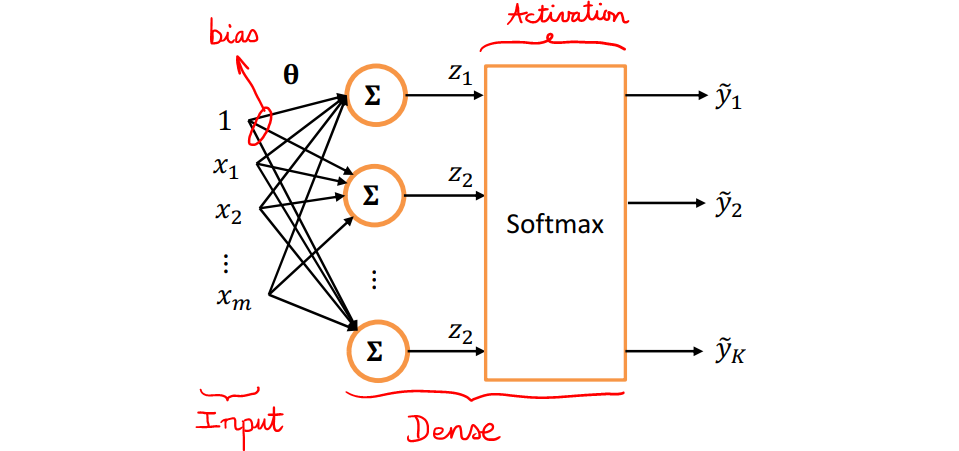

In [3]:
# Softmax Regression
class SoftmaxRegression:
    def __init__(self): # Self is similar to your 'this' pointer in C++
        return None

    def build(self, input_dim, output_dim):
        # `input_dim`: kích thước input feature
        # `output_dim`: số phân lớp cần phân loại

        # Khởi tạo model
        self.model = None

        # Hãy cài đặt để định nghĩa KIẾN TRÚC MÔ HÌNH và lưu ở thuộc tính `self.model`
        # với các biến đối tượng sau:
        #  - tạo biến `input` với lớp đối tượng `Input` của Keras,
        #    truyền vào kích thước đầu vào `input_dim`
        #  - tạo biến `output` với lớp đối tượng `Dense` của Keras,
        #    truyền vào các tham số:  kích thước output (chú ý PHÂN LOẠI ĐA LỚP),
        #    có sử dụng bias, CÓ SỬ DỤNG hàm activation là `softmax`.
        # Sau bước này, self.model sẽ đóng gói 2 biến `input` và `output` để tạo thành mô hình

        # YOUR CODE HERE
        #raise NotImplementedError()
        input_layer = Input(shape=(input_dim,))

        # Tạo biến `output` với lớp đối tượng `Dense` của Keras,
        output_layer = Dense(output_dim, activation='softmax', use_bias=True)(input_layer)
        self.model = Model(inputs=input_layer, outputs=output_layer)
        return self.model

    def train(self, x_train, y_train):
        opt = tf.keras.optimizers.SGD(learning_rate=0.01) # Stochastic Gradient Descent
        self.model.compile(optimizer=opt, loss='categorical_crossentropy') # CCE loss
        return self.model.fit(x_train, y_train, epochs=100)

    def save(self, model_file):
        return self.model.save(model_file)

    def load(self, model_file):
        self.model = load_model(model_file)

    def summary(self):
        self.model.summary()

    def predict(self, x_test):
        return self.model.predict(x_test)

    def get_weights(self):
        return self.model.layers[1].get_weights()

Tiếp theo, ta sẽ khởi tạo đối tượng SoftmaxRegression và kiểm tra thử xem phương `build` đã cài đặt chính xác chưa.

In [4]:
sr = SoftmaxRegression()
# Trong ví dụ này, ta sẽ khởi tạo input là một vector 1000 chiều,
# bài toán cần phân loại 20 lớp đối tượng.
sr.build(1000, 20)
sr.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 20)                20020     
                                                                 
Total params: 20020 (78.20 KB)
Trainable params: 20020 (78.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Kiểm tra kiến trúc mạng gồm 2 lớp: Input và Output
assert len(sr.model.layers)==2
assert str(type(sr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(sr.model.layers[1])).endswith("core.dense.Dense'>") == True
assert sr.model.layers[0].input_shape[0][1] == 1000
assert sr.model.layers[1].output_shape[1] == 20
assert sr.model.layers[1].use_bias == True

In [6]:
# Kiểm tra với bộ test ẩn

## 3. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo mẫu dữ liệu để huấn luyện và kiểm thử.

Dữ liệu được tạo ra là các điểm rải ngẫu nhiên xung quanh 4 cụm điểm:
- [10, -2]
- [2, 8]
- [12, 8]
- [-2, 0]

Lưu ý rằng, 4 cụm điểm này rời nhau đủ xa để khi thêm nhiễu ngẫu nhiên,
các điểm thuộc 4 cụm này vẫn không giao thoa nhau.

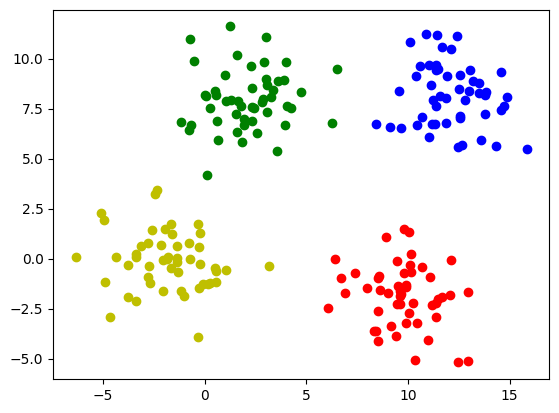

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Số phân lớp: 4
K = 4
# Tạo bộ dữ  liệu gồm 4 điểm
# S1, S2, S3, S4 là tâm của 4 lớp
S1= np.array([[10,-2]])
S2= np.array([[2,8]])
S3= np.array([[12,8]])
S4= np.array([[-2,0]])

# 50 samples mỗi lớp
n_sample = 50
# Phát sinh các điểm với nhiễu ngẫu nhiên xung quanh 4 tâm
pts1 = S1 + np.random.normal(0, 1.5, size=(n_sample,2))
pts2 = S2 + np.random.normal(0, 1.5, size=(n_sample,2))
pts3 = S3 + np.random.normal(0, 1.5, size=(n_sample,2))
pts4 = S4 + np.random.normal(0, 1.5, size=(n_sample,2))

# Nối tất cả các mẫu thành một khối dữ liệu X (input feature) và Y (nhãn)
X_train = np.concatenate((pts1, pts2, pts3, pts4))
# Concatenate data labels to a single input variable Y
Y_train = np.concatenate(([0]*n_sample, [1]*n_sample, [2]*n_sample, [3]*n_sample))

# Chuyển Y từ dạng nhãn sang one-hot vector
Y_train = Y_train.astype(int)
Y_oh = np.zeros((Y_train.size, Y_train.max()+1 ))
Y_oh[np.arange(Y_train.size), Y_train] = 1

# Trực quan hóa dữ liệu bằng các hình tròn màu đỏ, xanh lá, xanh dương và vàng
plt.plot(pts1[:,0], pts1[:,1], 'ro')
plt.plot(pts2[:,0], pts2[:,1], 'go')
plt.plot(pts3[:,0], pts3[:,1], 'bo')
plt.plot(pts4[:,0], pts4[:,1], 'yo')
plt.show()


## 4. Huấn luyện mô hình với dữ liệu mẫu

Tiếp theo, ta sẽ khởi tạo lại mô hình để phù hợp với dữ liệu mẫu đã phát sinh ở bước trước. Việc xây dựng kiến trúc của mô hình phải phù hợp với số chiều của dữ liệu mẫu.

In [8]:
sr = SoftmaxRegression()

# Hãy gọi phương thức `build` cho đối tượng `sr` và truyền tham số đầu vào
# tương ứng với dữ liệu train đã phát sinh ở code block trên
# Theo bạn, `input_dim` và `output_dim` bằng bao nhiêu?

# YOUR CODE HERE
sr.build(2,4)
#raise NotImplementedError()


# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("Kiến trúc của mô hình Softmax Regression: ")
sr.summary()

Kiến trúc của mô hình Softmax Regression: 
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Kiểm tra bước gọi phương thức `build`
assert len(sr.model.layers)==2
assert str(type(sr.model.layers[0])).endswith("input_layer.InputLayer'>") == True
assert str(type(sr.model.layers[1])).endswith("core.dense.Dense'>") == True
assert sr.model.layers[0].input_shape[0][1] == 2
assert sr.model.layers[1].output_shape[1] == 4
inputs = tf.random.normal(shape=(32, 10))
assert np.mean(abs(sr.model.layers[1].activation(inputs).numpy() -
                   tf.keras.activations.softmax(inputs).numpy()))<0.00001
assert sr.model.layers[1].use_bias == True

In [10]:
# Để huấn luyện mô hình ta gọi phương thức `train` với dữ liệu mẫu đã tạo được
# Nếu bước `build` mô hình gọi đúng thì bước `train` sau sẽ thực hiện thành công
# LƯU Ý: Ở đây ta sử dụng output là Y_oh dạng one-hot thay vì dạng nhãn (label)
hist = sr.train(X_train, Y_oh)

Epoch 1/100
7/7 [==============================] - 1s 5ms/step - loss: 7.4602
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 4.9227
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 3.5300
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 2.5797
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 1.8165
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1815
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8525
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6852
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6049
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5510
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5139
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4871
Epoch 13/100
7/7 [==============================] - 0s 3ms/st

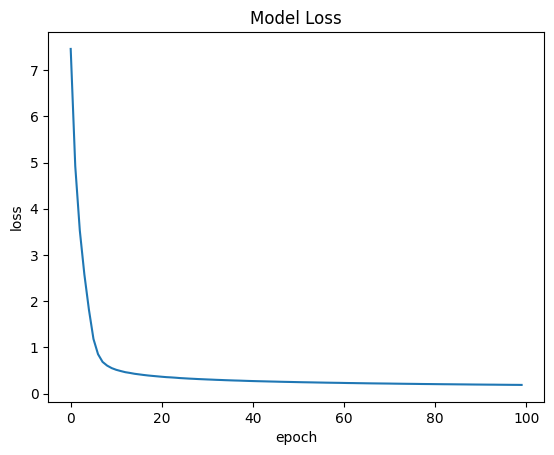

In [11]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [12]:
# Sau khi đã huấn luyện, ta lưu mô hình về để sau này tái sử dụng
# Lưu ý: hai phương thức lưu mô hình `save` và tải mô hình lên 'load'
# được sử dụng khi muốn tái sử dụng nhiều lần mà KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI
sr.save('softmax_regression_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [13]:
# Khởi tạo đối tượng mới và gọi phương thức load mô hình từ file
pretrain_sr = SoftmaxRegression()
pretrain_sr.load('softmax_regression_model.h5')

In [14]:
# Hiển thị bộ tham số của mô hình Softmax
theta = pretrain_sr.get_weights()
print('Tham số tối ưu: ')
print(theta)

Tham số tối ưu: 
[array([[ 0.6569824 , -0.18593739,  0.4769301 , -0.8028439 ],
       [-0.5617694 ,  0.7742758 ,  0.2579782 , -0.06801027]],
      dtype=float32), array([-0.1485408, -0.2114139, -0.3678737,  0.7278289], dtype=float32)]


20/20 [==============================] - 0s 6ms/step


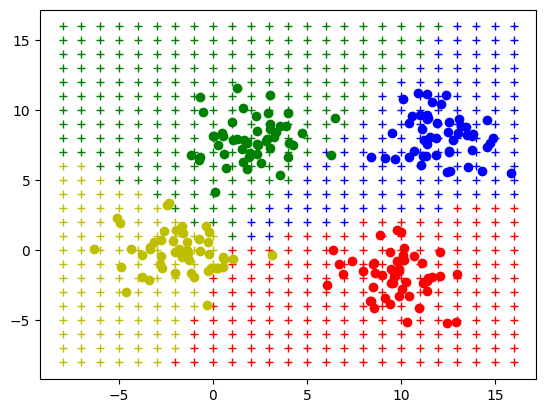

In [15]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
# Ý tưởng: lấy mẫu dày đặc các điểm trong phạm vi dữ liệu train
# Sau đó dùng mô hình để dự đoán và hiển thị kết quả

# `colors` là các marker được sử dụng để trực quan hóa kết quả test
colors = ['r+', 'g+', 'b+', 'y+']
# `gt_colors` là các marker được sử dụng để trực quan hóa dữ liệu train
gt_colors = ['ro', 'go', 'bo', 'yo']

# Lấy mẫu dày đặc các điểm
x = np.arange(-8, 17, 1)
y = np.arange(-8, 17, 1)
xx, yy = np.meshgrid(x,y)

xx = xx.reshape(-1)
yy = yy.reshape(-1)

# Tạo các dữ liệu test dày đặc
X_test = np.concatenate([[xx],[yy]], axis=0).T
Y_pred = pretrain_sr.predict(X_test)

for i in range(len(xx)):
    plt.plot(xx[i],yy[i], colors[np.argmax(Y_pred[i])])
plt.plot(pts1[:,0], pts1[:,1], gt_colors[0])
plt.plot(pts2[:,0], pts2[:,1], gt_colors[1])
plt.plot(pts3[:,0], pts3[:,1], gt_colors[2])
plt.plot(pts4[:,0], pts4[:,1], gt_colors[3])
plt.show()

Như vậy ta có thể thấy rằng, không gian mặt phẳng đã được phân loại sử dụng mô hình đã huấn luyện trước đó với Softmax Regression. Dựa trên hình trên ta thấy kết quả khá chính xác, chỉ trừ một số điểm ở biên giữa các lớp.